In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [2]:
# Load the dataset
train_file_path = 'train_u6lujuX_CVtuZ9i.csv'
df_train = pd.read_csv(train_file_path)

In [3]:
# Preprocessing
df_train['Gender'].fillna(df_train['Gender'].mode()[0], inplace=True)
df_train['Married'].fillna(df_train['Married'].mode()[0], inplace=True)
df_train['Dependents'].fillna('0', inplace=True)
df_train['Self_Employed'].fillna('No', inplace=True)
df_train['LoanAmount'].fillna(df_train['LoanAmount'].median(), inplace=True)
df_train['Loan_Amount_Term'].fillna(df_train['Loan_Amount_Term'].median(), inplace=True)
df_train['Credit_History'].fillna(0, inplace=True)
df_train.drop(columns=['Loan_ID'], inplace=True)

In [4]:
# Encode categorical variables
df_train = pd.get_dummies(df_train, columns=['Gender', 'Married', 'Dependents', 
                                             'Education', 'Self_Employed', 
                                             'Property_Area'], drop_first=True)
df_train['Loan_Status_Y'] = df_train['Loan_Status'].map({'Y': 1, 'N': 0})
df_train.drop(columns=['Loan_Status'], inplace=True)

In [5]:
# Split features and target
X = df_train.drop(['Loan_Status_Y'], axis=1)
y = df_train['Loan_Status_Y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
# Train different models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "Naive Bayes": GaussianNB()
}

In [7]:
# Store results
results = {}

In [8]:
# Train, evaluate, and store metrics
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = {
        "accuracy": accuracy,
        "classification_report": classification_report(y_test, y_pred, output_dict=True),
        "confusion_matrix": confusion_matrix(y_test, y_pred)
    }

C:\Users\Habibullah\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Habibullah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Habibullah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0

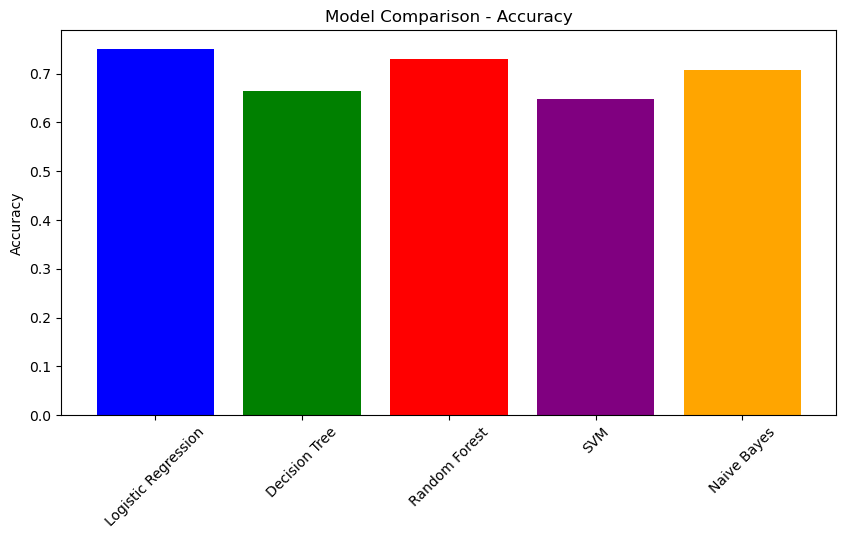

In [9]:
# Visualize accuracy comparison
plt.figure(figsize=(10, 5))
accuracies = [results[model]['accuracy'] for model in models]
plt.bar(models.keys(), accuracies, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.title("Model Comparison - Accuracy")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.show()

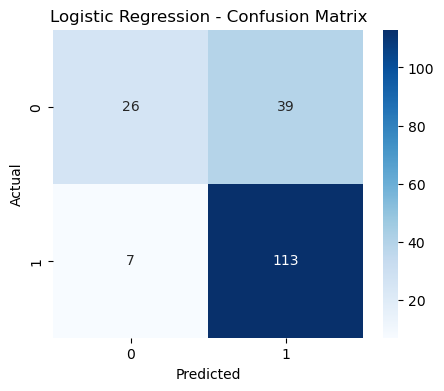

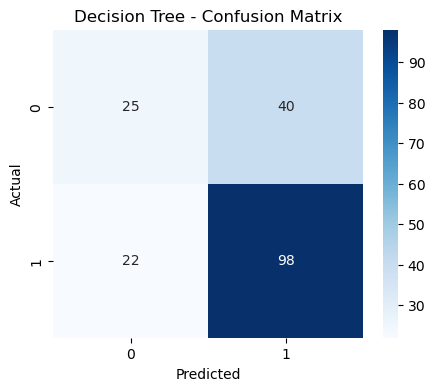

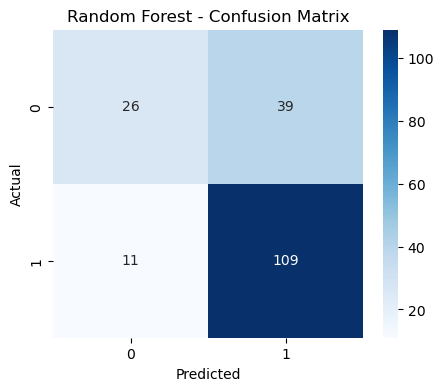

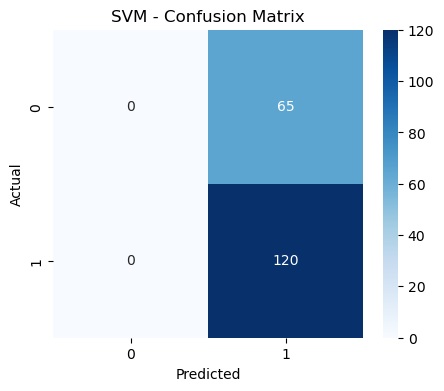

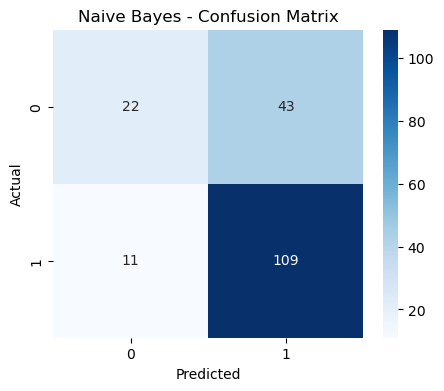

In [10]:
# Visualize confusion matrices
for model_name, result in results.items():
    plt.figure(figsize=(5, 4))
    sns.heatmap(result['confusion_matrix'], annot=True, fmt='d', cmap='Blues')
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
